In [25]:
import matplotlib.pyplot as plt
import numpy as np
import json
import argparse

opt:  Namespace(isTrain=True, model_dir='./output/ep100_bs32', data_dir='./TrainingData/dataset_700Mpc_250', n_feature=3, input_dim=7, idata_start=0, ndata=360, model='CNN', hidden_dim=32, n_layer=3, r_drop=0.0, batch_size=32, epoch=100, epoch_decay=0, lr=0.001, loss='l1norm')
ConvNet(
  (blocks): ModuleList(
    (0): ConvBlock(
      (conv): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (drop): Dropout(p=0, inplace=False)
      (act): LeakyReLU(negative_slope=0.01)
    )
    (1): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (drop): Dropout(p=0.0, inplace=False)
      (act): LeakyReLU(negative_slope=0.01)
    )
    (2): ConvBlock(
      (conv): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (drop): Dropout(p=0.0, inplace=False)
      (act): LeakyReLU(negative_slope=0.01)
    )
  )
  (linear): Linear(in_features=128, out_features=3, bias=True)
  (output_act): Sigmoid()
)


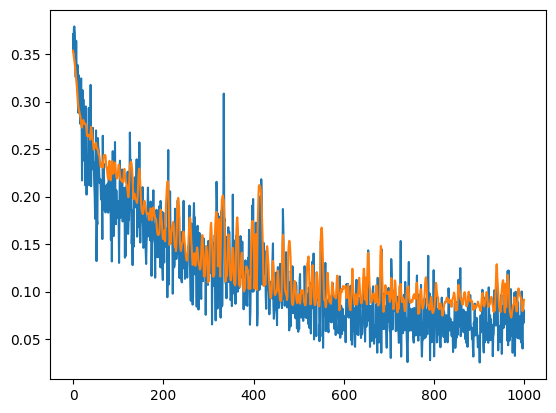

In [26]:
# check the iz_min and iz_max
model_dir = "./output/ep100_bs32"

loss = np.loadtxt(f"{model_dir}/log.txt")
plt.figure()
plt.plot(loss[:,0], loss[:,1], label="train")
plt.plot(loss[:,0], loss[:,2], label="val")


with open(f"{model_dir}/args.json", "r") as f:
    opt = json.load(f, object_hook=lambda d: argparse.Namespace(**d))
print("opt: ", opt)

from model import MyModel, ConvNet
model = MyModel(opt)
print(model)

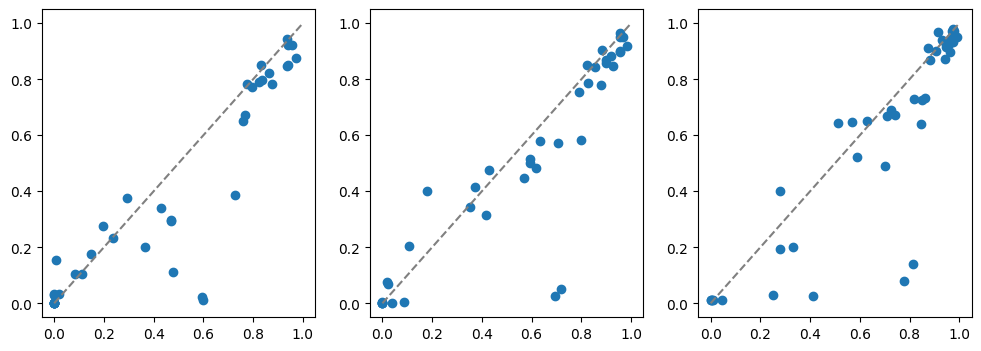

In [28]:
test = np.loadtxt(f"{model_dir}/test.txt")
plt.figure(figsize=(12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(test[:,2*i], test[:,2*i+1])

    xx = np.linspace(0,1,10)
    plt.plot(xx,xx, ls="--", color="gray")